Phạm Việt Nhật

Nguyễn Nhật Trường

Trần Đào Anh Trung 

Nguyễn Nhật Trí

1. Tài liệu kèm theo:
SCMission 2023 _ Round 3 Case (updated).pdf
SCMission 2023_Round 3 Data.xlsx
SCMission-2023_Round-3-Data-Đã clean.xlsm
SCMission 2023_Round 3 Case Answer (updated) .xlsx
2. Công việc thực hiện :
Thực hiện phân tích và phân cụm khách hàng bằng cách sử dụng phương pháp phân cụm K-mean (K-means clustering method) 
Sử dụng ngôn ngữ Python
3. Kết quả đạt được
Phân tích, lọc sạch dữ liệu trong bản data customer master
Tìm được số phân cụm K tối ưu dựa trên thuật toán 
Thực hiện phân cụm dựa trên thuật toán K-mean

# Import các thư viện cần thiết để xử lý vấn đề

In [1]:
from sklearn.cluster import KMeans 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import math
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 

## Read file

In [2]:
Product_Master = pd.read_excel("Product Master.xlsx",skiprows=1)
sales_order = pd.read_excel("sales order.xlsx") 
Product_Master = pd.read_excel("Product Master.xlsx",skiprows=1) 
Packaging_Master = pd.read_excel("Packaging Master.xlsx",skiprows=2) 
data = pd.read_excel("customer master.xlsx") 

# Hiệu chỉnh file Packaging_Master

Các file cần được hiệu chuẩn cho quá trình sử lý dữ liệu tiếp theo

In [3]:
Packaging_Master .columns=['Unit','Type','Weight','Recycled content','Virgin content']
Packaging_Master ['Unit']= ['CTN','CTN','CTN','CTN','PBOT','PBOT','GBOT','GBOT','GBOT']
Packaging_Master ['Recycled content']= ['0.57','0.57','0.57','0.57','1.7','1.7','0.55','0.55','0.55']
Packaging_Master ['Virgin content']= ['0.7','0.7','0.7','0.7','3.1','3.1','1.2','1.2','1.2']

Packaging_Master

,Unit,Type,Weight,Recycled content,Virgin content
0,CTN,400G,40,0.57,0.7
1,CTN,15ML,5,0.57,0.7
2,CTN,250ML,25,0.57,0.7
3,CTN,1L,50,0.57,0.7
4,PBOT,300ML,15,1.7,3.1
5,PBOT,600ML,25,1.7,3.1
6,GBOT,1L,500,0.55,1.2
7,GBOT,2L,1000,0.55,1.2
8,GBOT,3L,1500,0.55,1.2


#### Lọc các cột cần thiết trong dữ liệu sales_order


In [4]:
df1 = pd.DataFrame(sales_order)
columns_to_extract = [ 'SOCreationDate','CustomerRef', 'ProductID','NetWeightInKg','GrossWeightInKg']  
Sales = df1[columns_to_extract]
df1

,STT,SOCreationDate,OrderNumber,OriginRef,ProductID,CustomerRef,Legit?,DeliveryDate,GoodsIssueDate,RequestedDelivDate,Channel,SalesOrganization,OrderQuantityInKg,DispatchQuantityInKg,GrossWeightInKg,NetWeightInKg,Unnamed: 16,Unnamed: 17
0,1,2021-08-02,5233870,A044,3110685,14019842,Yes,NaT,NaT,2021-08-03,GR,Organization 1,57224.8944,57224.8944,58697.5260,57224.8944,2.066,27698.4
1,2,2021-08-02,5233874,A044,3110678,14019842,Yes,NaT,NaT,2021-08-03,GR,Organization 1,77232.0384,77232.0384,79387.7568,77232.0384,3.099,24921.6
2,3,2021-08-02,5233877,A044,3103449,14019842,Yes,NaT,NaT,2021-08-03,GR,Organization 1,13387.6800,13387.6800,13732.2000,13387.6800,2.066,6480.0
3,4,2021-08-02,5233877,A044,3103450,14019842,Yes,NaT,NaT,2021-08-03,GR,Organization 1,2380.0320,2380.0320,2446.4640,2380.0320,3.099,768.0
4,5,2021-08-02,5234064,A044,3110656,11002626,Yes,NaT,NaT,2021-08-02,GR,Organization 1,7147.0080,7147.0080,7330.7520,7147.0080,2.068,3456.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28675,28676,2022-12-31,5783479,A044,3110687,11002626,Yes,2022-12-31,2022-12-31,2022-12-31,GR,Organization 1,11911.6800,11911.6800,12243.8400,11911.6800,NaN,NaN
28676,28677,2022-12-31,5783497,A044,3110656,11002626,Yes,2023-01-01,2023-01-01,2023-01-01,GR,Organization 1,8338.1760,8338.1760,8552.5440,8338.1760,NaN,NaN
28677,28678,2022-12-31,5783497,A044,3110678,11002626,Yes,2023-01-01,2023-01-01,2023-01-01,GR,Organization 1,32130.4320,32130.4320,33027.2640,32130.4320,NaN,NaN
28678,28679,2022-12-31,5783497,A044,3110685,11002626,Yes,2023-01-01,2023-01-01,2023-01-01,GR,Organization 1,15470.2080,15470.2080,15868.3200,15470.2080,NaN,NaN


#### merge các số liệu từ bảng Packaging_Master với bản Product_Master 

cần merge để có thể các định được Weight của từng loại hàng dựa vào Unit và Type

In [5]:
bang_1 = pd.merge(Product_Master, Packaging_Master[['Unit', 'Type','Weight']], on=['Unit', 'Type'], how='left')
bang_1.head()

,STT,ProductID,ProductName,Category,SubCategory,BaseUnit,ShelfLifeInDays,KgPerCarton,KgPerLiter,StorageCondition,TempCondition,m^3PerCarton,KgPerPallet,CartonsPerPallet,Unit,UnitperCarton,Type,Weight
0,1,3110922,AW MLK WHOLE CN 9X1L BOT EXP,Consumer Dairy Liquid,Fresh White Milk,CAR,21,9.297,1.033,Chilled,+2 Degrees,0.013,929.7,100.0,GBOT,9,1L,500
1,2,3113090,NAC AE WHIPD CRM 12X400G CTN,Consumer Dairy Liquid,Fresh Cream,CAR,365,4.800,1.000,Chilled,+2 Degrees,0.015,403.2,84.0,CTN,12,400G,40
2,3,3112144,NAC AE WHIPD CRM 9X400G CTN,Consumer Dairy Liquid,Fresh Cream,CAR,365,3.600,1.000,Chilled,+2 Degrees,0.012,345.6,96.0,CTN,9,400G,40
3,4,116052,NAC UHT CRM CUL CRM AU 12X1L CTN,Consumer Dairy Liquid UHT,UHT Cream,CAR,270,12.144,1.012,Chilled,+2 Degrees,0.015,910.8,75.0,CTN,12,1L,50
4,5,115532,NAC UHT CRM EX YD AU 12X1L,Consumer Dairy Liquid UHT,UHT Cream,CAR,270,12.348,1.029,Chilled,+2 Degrees,0.015,926.1,75.0,CTN,12,1L,50


Merge từ bảng trên với bảng Sales để có các thông số cần thiết của mặc hàng 

In [6]:
bang1= pd.DataFrame()
bang1 = pd.merge(Sales, bang_1[['KgPerPallet','ProductID','Weight','UnitperCarton','CartonsPerPallet','Unit']], on=['ProductID'], how='left')
bang1

,SOCreationDate,CustomerRef,ProductID,NetWeightInKg,GrossWeightInKg,KgPerPallet,Weight,UnitperCarton,CartonsPerPallet,Unit
0,2021-08-02,14019842,3110685,57224.8944,58697.5260,991.68,1000,6,80.0,GBOT
1,2021-08-02,14019842,3110678,77232.0384,79387.7568,991.68,1500,4,80.0,GBOT
2,2021-08-02,14019842,3103449,13387.6800,13732.2000,991.68,1000,6,80.0,GBOT
3,2021-08-02,14019842,3103450,2380.0320,2446.4640,991.68,1500,4,80.0,GBOT
4,2021-08-02,11002626,3110656,7147.0080,7330.7520,992.64,1000,6,80.0,GBOT
...,...,...,...,...,...,...,...,...,...,...
28675,2022-12-31,11002626,3110687,11911.6800,12243.8400,992.64,1500,4,80.0,GBOT
28676,2022-12-31,11002626,3110656,8338.1760,8552.5440,992.64,1000,6,80.0,GBOT
28677,2022-12-31,11002626,3110678,32130.4320,33027.2640,991.68,1500,4,80.0,GBOT
28678,2022-12-31,11002626,3110685,15470.2080,15868.3200,991.68,1000,6,80.0,GBOT


#### Hàm làm tròn

In [7]:
def round_up(x):
    return math.ceil(x)

# Thêm cột tính số pallet

In [8]:
bang1["pallet"]=bang1['GrossWeightInKg']/bang1['KgPerPallet']/2

In [9]:
bang1

,SOCreationDate,CustomerRef,ProductID,NetWeightInKg,GrossWeightInKg,KgPerPallet,Weight,UnitperCarton,CartonsPerPallet,Unit,pallet
0,2021-08-02,14019842,3110685,57224.8944,58697.5260,991.68,1000,6,80.0,GBOT,29.594993
1,2021-08-02,14019842,3110678,77232.0384,79387.7568,991.68,1500,4,80.0,GBOT,40.026902
2,2021-08-02,14019842,3103449,13387.6800,13732.2000,991.68,1000,6,80.0,GBOT,6.923705
3,2021-08-02,14019842,3103450,2380.0320,2446.4640,991.68,1500,4,80.0,GBOT,1.233495
4,2021-08-02,11002626,3110656,7147.0080,7330.7520,992.64,1000,6,80.0,GBOT,3.692553
...,...,...,...,...,...,...,...,...,...,...,...
28675,2022-12-31,11002626,3110687,11911.6800,12243.8400,992.64,1500,4,80.0,GBOT,6.167311
28676,2022-12-31,11002626,3110656,8338.1760,8552.5440,992.64,1000,6,80.0,GBOT,4.307979
28677,2022-12-31,11002626,3110678,32130.4320,33027.2640,991.68,1500,4,80.0,GBOT,16.652178
28678,2022-12-31,11002626,3110685,15470.2080,15868.3200,991.68,1000,6,80.0,GBOT,8.000726


# Tạo bảng chứa các dữ liệu features


In [11]:
grouped=bang1[['CustomerRef','pallet']].groupby('CustomerRef')['pallet'].sum().reset_index()

grouped


,CustomerRef,pallet
0,11000128,49.071341
1,11000144,4.361266
2,11000149,3.823807
3,11000159,0.201081
4,11000176,1.957645
...,...,...
309,14021924,52.557500
310,14022011,19.356260
311,14022270,7.648413
312,14022376,3.698075


In [12]:
data

,STT,CustomerRef,CustomerName,SoldToCode,SoldToName,MajorAccount,MajorAccountCode,MajorAccountCode.1,Channel,SubChannel,Longitude,Latitude,City,State,Country,SalesOrganization,Region
0,1,11000128,Customer 48,11000128,Company 4,Account 3,91363,91240,Foodservice,National Distributor,145.206237,-38.025962,Greater Dandenong,Victoria,Australia,Organization 1,Greater Melbourne
1,2,11000144,Customer 50,11000144,Company 6,Account 4,91418,91295,Foodservice,National Distributor,144.947676,-37.728991,Moreland,Victoria,Australia,Organization 1,Greater Melbourne
2,3,11000149,Customer 51,11000149,Company 7,Account 3,91363,91240,Foodservice,National Distributor,152.519049,-32.197687,Great Lakes,New South Wales,Australia,Organization 1,Mid North Coast
3,4,11000159,Customer 52,11000159,Company 8,Account 3,91363,91240,Foodservice,National Distributor,153.122555,-27.617230,Logan,Queensland,Australia,Organization 1,Greater Brisbane
4,5,11000176,Customer 53,11000176,Company 9,Account 4,91418,91295,Foodservice,National Distributor,145.197119,-37.990926,Greater Dandenong,Victoria,Australia,Organization 1,Greater Melbourne
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,310,14021924,Customer 639,11002237,Company 211,Account 11,91379,91256,Foodservice,Global QSR Distributor,153.118374,-27.445906,Brisbane,Queensland,Australia,NaN,Greater Brisbane
310,311,14022011,Customer 640,14001726,Company 305,Account 3,91363,91240,Foodservice,National Distributor,153.103894,-27.425455,Brisbane,Queensland,Australia,NaN,Greater Brisbane
311,312,14022270,Customer 650,11000312,Company 27,Account 6,91346,91223,Foodservice,National Distributor,144.371612,-38.054289,Greater Geelong,Victoria,Australia,NaN,Ballarat & Geelong
312,313,14022376,Customer 855,14022376,Company 499,Account 14,91437,91314,Foodservice,National Distributor,147.383224,-35.121731,Wagga Wagga,New South Wales,Australia,NaN,Riverina


In [13]:
features = data[['CustomerRef','Longitude', 'Latitude']].merge(grouped, on=['CustomerRef'], how='inner')
features

,CustomerRef,Longitude,Latitude,pallet
0,11000128,145.206237,-38.025962,49.071341
1,11000144,144.947676,-37.728991,4.361266
2,11000149,152.519049,-32.197687,3.823807
3,11000159,153.122555,-27.617230,0.201081
4,11000176,145.197119,-37.990926,1.957645
...,...,...,...,...
309,14021924,153.118374,-27.445906,52.557500
310,14022011,153.103894,-27.425455,19.356260
311,14022270,144.371612,-38.054289,7.648413
312,14022376,147.383224,-35.121731,3.698075


In [14]:
features= features.drop('CustomerRef', axis=1)
features

,Longitude,Latitude,pallet
0,145.206237,-38.025962,49.071341
1,144.947676,-37.728991,4.361266
2,152.519049,-32.197687,3.823807
3,153.122555,-27.617230,0.201081
4,145.197119,-37.990926,1.957645
...,...,...,...
309,153.118374,-27.445906,52.557500
310,153.103894,-27.425455,19.356260
311,144.371612,-38.054289,7.648413
312,147.383224,-35.121731,3.698075


## Chuẩn hóa dữ liệu

In [15]:
scaler = StandardScaler()

In [16]:
scaler.fit(features)

StandardScaler()

In [17]:
scaled_data = scaler.transform(features)

In [18]:
scaled_data= pd.DataFrame(scaled_data, columns=['Longitude', 'Latitude', 'pallet'])

In [19]:
scaled_data

,Longitude,Latitude,pallet
0,0.167711,-0.979263,-0.067016
1,0.145621,-0.931228,-0.076966
2,0.792464,-0.036535,-0.077086
3,0.844023,0.704357,-0.077892
4,0.166932,-0.973596,-0.077501
...,...,...,...
309,0.843666,0.732069,-0.066240
310,0.842429,0.735377,-0.073629
311,0.096406,-0.983845,-0.076235
312,0.353696,-0.509502,-0.077114


## thực hiện chọn số điểm Clustering

#### Biểu đồ thể hiện tương quan lượng pallet 1 năm của các customer

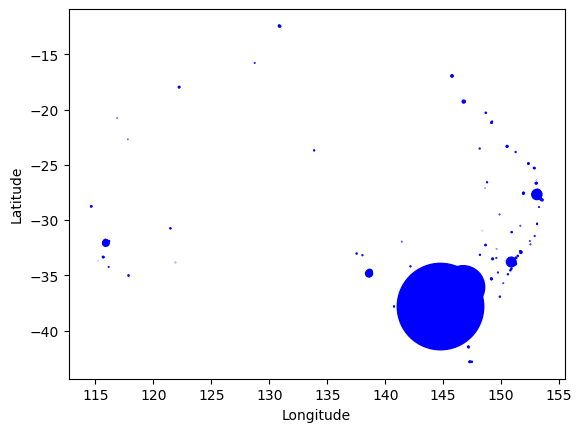

In [21]:
fig, ax = plt.subplots()
# Vẽ các điểm với kích thước phụ thuộc vào capacity
scatter = ax.scatter(features['Longitude'], features['Latitude'], c='blue', s=features['pallet']/20, label='Data Points')
# Đặt tên trục và tiêu đề
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
# Hiển thị biểu đồ
plt.show()

#### Biểu đồ phương pháp Elbow

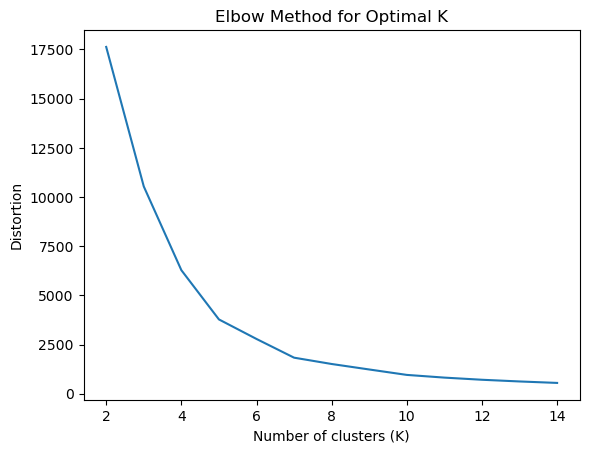

In [22]:
import os
import warnings
warnings.filterwarnings("ignore")
os.environ['OMP_NUM_THREADS'] = '2'

data = pd.read_excel("customer master.xlsx")  
features = data[['Longitude', 'Latitude']] 
distortions = []  

for k in range(2, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    distortions.append(kmeans.inertia_) 

plt.plot(list(range(2, 15)), distortions)  
plt.ylabel('Distortion') 
plt.xlabel('Number of clusters (K)')
plt.title('Elbow Method for Optimal K')
plt.show()


kết hợp 2 sơ đồ trên  ta nhận thấy tại điểm K=4 thì việc clustering đạt hiểu quả cao

Do đó ta chọn phân làm 4 cụm dựa vào 3 feauture 

# Thực hiện Kmean với K=4 từ 

In [22]:
data_1=data

In [23]:

kmeans = KMeans(n_clusters=4)  
# Thực hiện phân cụm trên dữ liệu
kmeans.fit(scaled_data)
# Thêm kết quả phân cụm vào DataFrame gốc
data_1['Cluster'] = kmeans.labels_
centroid1 = kmeans.cluster_centers_

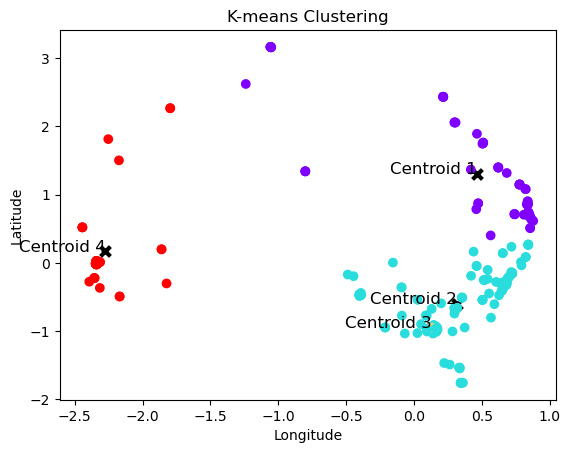

In [24]:
for i, centroid in enumerate(centroid1):
    plt.scatter(centroid[0], centroid[1], marker='x', s=50, c='black', linewidths=3)
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', fontsize=12, ha='right')

# Trực quan dữ liệu
plt.scatter(scaled_data['Longitude'], scaled_data['Latitude'], c=data_1['Cluster'], cmap='rainbow')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-means Clustering')

plt.show()

dễ nhận thấy tại cụm Cluster 2 đang bao bọc cluster 3

xét về mặt vận chuyển, nếu ta để cluster 3 thu thập từ các khách hàng của cluster 2 ở phía tây thì chi phí di chuyển sẽ là tối ưu
hơn 

# Lọc lấy riêng dữ liệu các khách hàng tại Cluster 3 và Cluster 2 với cụm khách hàng Cluster 1 và Cluster 4

In [25]:
data_cluster=0
data_cluster = data_1[(data_1['Cluster'] == 1) | (data_1['Cluster'] == 2) ]
data_cluster

,STT,CustomerRef,CustomerName,SoldToCode,SoldToName,MajorAccount,MajorAccountCode,MajorAccountCode.1,Channel,SubChannel,Longitude,Latitude,City,State,Country,SalesOrganization,Region,Cluster
0,1,11000128,Customer 48,11000128,Company 4,Account 3,91363,91240,Foodservice,National Distributor,145.206237,-38.025962,Greater Dandenong,Victoria,Australia,Organization 1,Greater Melbourne,1
1,2,11000144,Customer 50,11000144,Company 6,Account 4,91418,91295,Foodservice,National Distributor,144.947676,-37.728991,Moreland,Victoria,Australia,Organization 1,Greater Melbourne,1
2,3,11000149,Customer 51,11000149,Company 7,Account 3,91363,91240,Foodservice,National Distributor,152.519049,-32.197687,Great Lakes,New South Wales,Australia,Organization 1,Mid North Coast,1
4,5,11000176,Customer 53,11000176,Company 9,Account 4,91418,91295,Foodservice,National Distributor,145.197119,-37.990926,Greater Dandenong,Victoria,Australia,Organization 1,Greater Melbourne,1
7,8,11000197,Customer 56,11000197,Company 12,Account 5,91401,91278,Foodservice,Independent Distributor,144.869168,-37.710698,Brimbank,Victoria,Australia,Organization 1,Greater Melbourne,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,306,14021494,Customer 831,14021494,Company 482,Account 111,99167,99044,Foodservice,National Distributor,147.275191,-42.828202,Glenorchy,Tasmania,Australia,NaN,Hobart & South East,1
306,307,14021496,Customer 832,14021496,Company 483,Account 111,99167,99044,Foodservice,National Distributor,150.848893,-34.005690,Campbelltown,New South Wales,Australia,NaN,Greater Sydney,1
307,308,14021687,Customer 633,11000744,Company 64,Account 3,91363,91240,Foodservice,National Distributor,138.689476,-34.880272,Campbelltown,South Australia,Australia,NaN,Adelaide,1
311,312,14022270,Customer 650,11000312,Company 27,Account 6,91346,91223,Foodservice,National Distributor,144.371612,-38.054289,Greater Geelong,Victoria,Australia,NaN,Ballarat & Geelong,1


In [26]:
data_choose=0
data_choose = data_1[(data_1['Cluster'] == 0) | (data_1['Cluster'] ==3) ]

In [27]:
data_choose

,STT,CustomerRef,CustomerName,SoldToCode,SoldToName,MajorAccount,MajorAccountCode,MajorAccountCode.1,Channel,SubChannel,Longitude,Latitude,City,State,Country,SalesOrganization,Region,Cluster
3,4,11000159,Customer 52,11000159,Company 8,Account 3,91363,91240,Foodservice,National Distributor,153.122555,-27.617230,Logan,Queensland,Australia,Organization 1,Greater Brisbane,0
5,6,11000181,Customer 54,11000181,Company 10,Account 3,91363,91240,Foodservice,National Distributor,130.857160,-12.431262,Darwin,Northern Territory,Australia,Organization 1,Darwin,0
6,7,11000185,Customer 55,11000185,Company 11,Account 3,91363,91240,Foodservice,National Distributor,115.921880,-32.000100,Canning,Western Australia,Australia,Organization 1,Perth,3
10,11,11000299,Customer 59,11000299,Company 15,Account 6,91346,91223,Foodservice,National Distributor,152.364337,-24.862792,Bundaberg,Queensland,Australia,Organization 1,Sunshine Coast & Wide Bay,0
11,12,11000300,Customer 60,11000300,Company 16,Account 6,91346,91223,Foodservice,National Distributor,151.244899,-23.839975,Gladstone,Queensland,Australia,Organization 1,Central Queensland,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,304,14021364,Customer 826,14021364,Company 478,Account 6,91346,91223,Foodservice,National Distributor,115.650286,-33.338060,Bunbury,Western Australia,Australia,NaN,Mandurah & Bunbury,3
308,309,14021786,Customer 638,11001780,Company 167,Account 3,91363,91240,Foodservice,National Distributor,115.813580,-31.904670,Stirling,Western Australia,Australia,NaN,Perth,3
309,310,14021924,Customer 639,11002237,Company 211,Account 11,91379,91256,Foodservice,Global QSR Distributor,153.118374,-27.445906,Brisbane,Queensland,Australia,NaN,Greater Brisbane,0
310,311,14022011,Customer 640,14001726,Company 305,Account 3,91363,91240,Foodservice,National Distributor,153.103894,-27.425455,Brisbane,Queensland,Australia,NaN,Greater Brisbane,0


### Trực quan dữ liệu Cluster 3 và Cluster 1

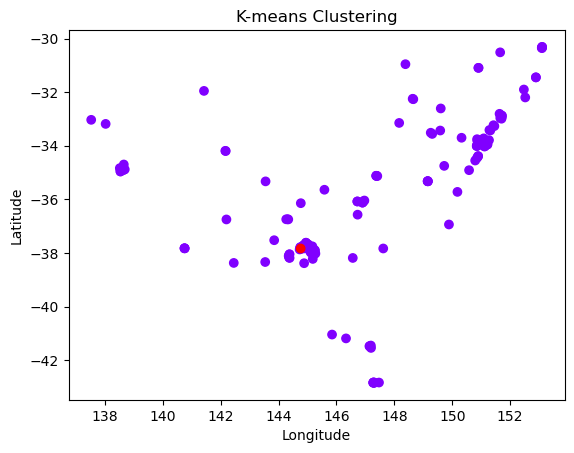

In [28]:

# Trực quan dữ liệu
plt.scatter(data_cluster['Longitude'], data_cluster['Latitude'], c=data_cluster['Cluster'], cmap='rainbow')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-means Clustering')
plt.show()

# Thực hiện K-mean nhóm khách hàng được tạo từ cluster 1 và 3 

Ở giai đoạn này ta thực hiện lựa chọn 2 feature chính là Longgitude và Latitude 

In [29]:
feu= data_cluster[['Longitude', 'Latitude']]

In [30]:
data_cluster = data_cluster.drop('Cluster', axis=1)

In [31]:
data_cluster

,STT,CustomerRef,CustomerName,SoldToCode,SoldToName,MajorAccount,MajorAccountCode,MajorAccountCode.1,Channel,SubChannel,Longitude,Latitude,City,State,Country,SalesOrganization,Region
0,1,11000128,Customer 48,11000128,Company 4,Account 3,91363,91240,Foodservice,National Distributor,145.206237,-38.025962,Greater Dandenong,Victoria,Australia,Organization 1,Greater Melbourne
1,2,11000144,Customer 50,11000144,Company 6,Account 4,91418,91295,Foodservice,National Distributor,144.947676,-37.728991,Moreland,Victoria,Australia,Organization 1,Greater Melbourne
2,3,11000149,Customer 51,11000149,Company 7,Account 3,91363,91240,Foodservice,National Distributor,152.519049,-32.197687,Great Lakes,New South Wales,Australia,Organization 1,Mid North Coast
4,5,11000176,Customer 53,11000176,Company 9,Account 4,91418,91295,Foodservice,National Distributor,145.197119,-37.990926,Greater Dandenong,Victoria,Australia,Organization 1,Greater Melbourne
7,8,11000197,Customer 56,11000197,Company 12,Account 5,91401,91278,Foodservice,Independent Distributor,144.869168,-37.710698,Brimbank,Victoria,Australia,Organization 1,Greater Melbourne
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,306,14021494,Customer 831,14021494,Company 482,Account 111,99167,99044,Foodservice,National Distributor,147.275191,-42.828202,Glenorchy,Tasmania,Australia,NaN,Hobart & South East
306,307,14021496,Customer 832,14021496,Company 483,Account 111,99167,99044,Foodservice,National Distributor,150.848893,-34.005690,Campbelltown,New South Wales,Australia,NaN,Greater Sydney
307,308,14021687,Customer 633,11000744,Company 64,Account 3,91363,91240,Foodservice,National Distributor,138.689476,-34.880272,Campbelltown,South Australia,Australia,NaN,Adelaide
311,312,14022270,Customer 650,11000312,Company 27,Account 6,91346,91223,Foodservice,National Distributor,144.371612,-38.054289,Greater Geelong,Victoria,Australia,NaN,Ballarat & Geelong


#### Thực hiện Kmean với K=2

In [32]:
kmeans = KMeans(n_clusters=2)  
# Thực hiện phân cụm trên dữ liệu
kmeans.fit(feu)
# Thêm kết quả phân cụm vào DataFrame gốc
data_cluster['Cluster'] = kmeans.labels_
centroids = kmeans.cluster_centers_

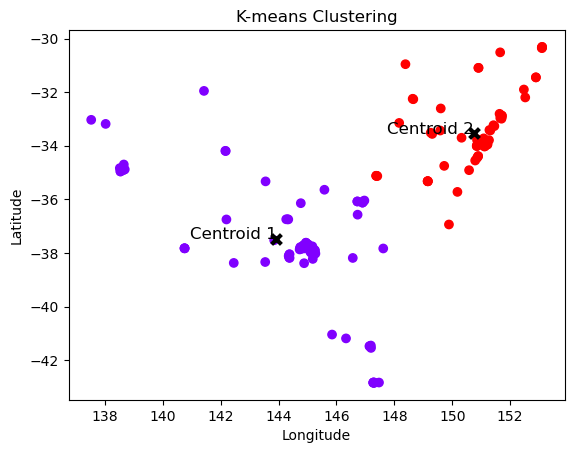

In [33]:
#Trực quan dữ liệu 
plt.scatter(data_cluster['Longitude'],data_cluster['Latitude'], c=data_cluster['Cluster'], cmap='rainbow')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-means Clustering')
for i, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], marker='x', s=50, c='black', linewidths=3)
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', fontsize=12, ha='right')
plt.show()


thực hiện các bước phụ để phân chia các khách hàng cho phù hợp 

In [34]:
data_cluster.loc[(data_cluster['Longitude'] > 146) | (data_cluster['Latitude'] < -40), 'Cluster'] = 1
#data_cluster.loc[ (data_cluster['Latitude'] < -40), 'Cluster'] = 4
#data_cluster.loc[(data_cluster['Longitude'] > 146) & (data_cluster['Latitude'] > -40), 'Cluster'] = 1
#data_cluster.loc[(data_cluster['Longitude'] > 146) & (data_cluster['Latitude'] > -37), 'Cluster'] = 1

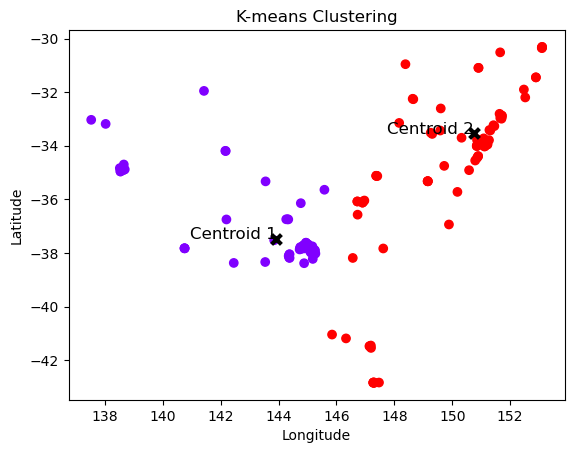

In [35]:
plt.scatter(data_cluster['Longitude'],data_cluster['Latitude'], c=data_cluster['Cluster'], cmap='rainbow')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-means Clustering')
for i, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], marker='x', s=50, c='black', linewidths=3)
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', fontsize=12, ha='right')
plt.show()

#### đổi tên các Cluseter để phù hợp với data ban đầu

In [36]:
data_cluster['Cluster'] = data_cluster['Cluster'].replace(0, 2)
data_cluster['Cluster'] = data_cluster['Cluster'].replace(1, 1)

## sau khi thực hiện phân chia, thực hiện nói 2 bảng dữ liệu

In [37]:
result=0
result = pd.concat([data_cluster,data_choose])
result

,STT,CustomerRef,CustomerName,SoldToCode,SoldToName,MajorAccount,MajorAccountCode,MajorAccountCode.1,Channel,SubChannel,Longitude,Latitude,City,State,Country,SalesOrganization,Region,Cluster
0,1,11000128,Customer 48,11000128,Company 4,Account 3,91363,91240,Foodservice,National Distributor,145.206237,-38.025962,Greater Dandenong,Victoria,Australia,Organization 1,Greater Melbourne,2
1,2,11000144,Customer 50,11000144,Company 6,Account 4,91418,91295,Foodservice,National Distributor,144.947676,-37.728991,Moreland,Victoria,Australia,Organization 1,Greater Melbourne,2
2,3,11000149,Customer 51,11000149,Company 7,Account 3,91363,91240,Foodservice,National Distributor,152.519049,-32.197687,Great Lakes,New South Wales,Australia,Organization 1,Mid North Coast,1
4,5,11000176,Customer 53,11000176,Company 9,Account 4,91418,91295,Foodservice,National Distributor,145.197119,-37.990926,Greater Dandenong,Victoria,Australia,Organization 1,Greater Melbourne,2
7,8,11000197,Customer 56,11000197,Company 12,Account 5,91401,91278,Foodservice,Independent Distributor,144.869168,-37.710698,Brimbank,Victoria,Australia,Organization 1,Greater Melbourne,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,304,14021364,Customer 826,14021364,Company 478,Account 6,91346,91223,Foodservice,National Distributor,115.650286,-33.338060,Bunbury,Western Australia,Australia,NaN,Mandurah & Bunbury,3
308,309,14021786,Customer 638,11001780,Company 167,Account 3,91363,91240,Foodservice,National Distributor,115.813580,-31.904670,Stirling,Western Australia,Australia,NaN,Perth,3
309,310,14021924,Customer 639,11002237,Company 211,Account 11,91379,91256,Foodservice,Global QSR Distributor,153.118374,-27.445906,Brisbane,Queensland,Australia,NaN,Greater Brisbane,0
310,311,14022011,Customer 640,14001726,Company 305,Account 3,91363,91240,Foodservice,National Distributor,153.103894,-27.425455,Brisbane,Queensland,Australia,NaN,Greater Brisbane,0


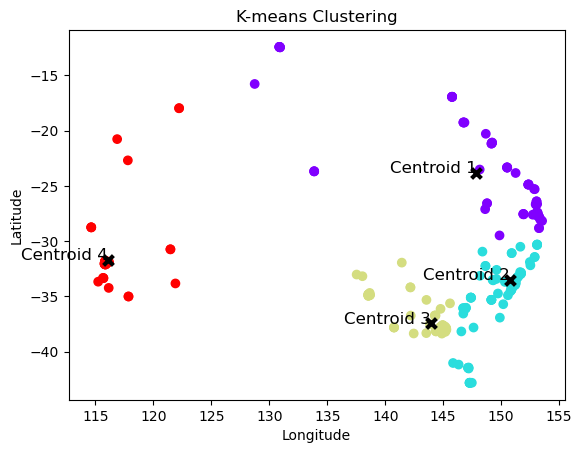

In [51]:
plt.scatter(result['Longitude'], result['Latitude'], c=result['Cluster'], cmap='rainbow')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
for i, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], marker='x', s=50, c='black', linewidths=3)
    plt.text(centroid[0], centroid[1], f'Centroid {abs(i-3) }', fontsize=12, ha='right')
plt.scatter(147.869168, -23.80698, marker='x', s=50, c='black', linewidths=3)
plt.text(147.869168, -23.80698, f'Centroid 1', fontsize=12, ha='right')
plt.scatter(116.076452, -31.710698, marker='x', s=50, c='black', linewidths=3)
plt.text(116.076452, -31.710698, f'Centroid 4', fontsize=12, ha='right')
plt.title('K-means Clustering')
plt.show()

## Lưu bảng dữ liệu vào file answer_task1_new.xlsx để sử dụng cho task 2

In [52]:
selected_columns = result[['CustomerName', 'Cluster']]
df=pd.DataFrame(selected_columns)
file_name = 'answer_task1_new.xlsx'
df.to_excel(file_name, index=False)

In [53]:

selected_columns = result[['CustomerName', 'Cluster']]
feu=pd.DataFrame(selected_columns)
feu


,CustomerName,Cluster
0,Customer 48,2
1,Customer 50,2
2,Customer 51,1
4,Customer 53,2
7,Customer 56,2
...,...,...
303,Customer 826,3
308,Customer 638,3
309,Customer 639,0
310,Customer 640,0


In [54]:
result

,STT,CustomerRef,CustomerName,SoldToCode,SoldToName,MajorAccount,MajorAccountCode,MajorAccountCode.1,Channel,SubChannel,Longitude,Latitude,City,State,Country,SalesOrganization,Region,Cluster
0,1,11000128,Customer 48,11000128,Company 4,Account 3,91363,91240,Foodservice,National Distributor,145.206237,-38.025962,Greater Dandenong,Victoria,Australia,Organization 1,Greater Melbourne,2
1,2,11000144,Customer 50,11000144,Company 6,Account 4,91418,91295,Foodservice,National Distributor,144.947676,-37.728991,Moreland,Victoria,Australia,Organization 1,Greater Melbourne,2
2,3,11000149,Customer 51,11000149,Company 7,Account 3,91363,91240,Foodservice,National Distributor,152.519049,-32.197687,Great Lakes,New South Wales,Australia,Organization 1,Mid North Coast,1
4,5,11000176,Customer 53,11000176,Company 9,Account 4,91418,91295,Foodservice,National Distributor,145.197119,-37.990926,Greater Dandenong,Victoria,Australia,Organization 1,Greater Melbourne,2
7,8,11000197,Customer 56,11000197,Company 12,Account 5,91401,91278,Foodservice,Independent Distributor,144.869168,-37.710698,Brimbank,Victoria,Australia,Organization 1,Greater Melbourne,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,304,14021364,Customer 826,14021364,Company 478,Account 6,91346,91223,Foodservice,National Distributor,115.650286,-33.338060,Bunbury,Western Australia,Australia,NaN,Mandurah & Bunbury,3
308,309,14021786,Customer 638,11001780,Company 167,Account 3,91363,91240,Foodservice,National Distributor,115.813580,-31.904670,Stirling,Western Australia,Australia,NaN,Perth,3
309,310,14021924,Customer 639,11002237,Company 211,Account 11,91379,91256,Foodservice,Global QSR Distributor,153.118374,-27.445906,Brisbane,Queensland,Australia,NaN,Greater Brisbane,0
310,311,14022011,Customer 640,14001726,Company 305,Account 3,91363,91240,Foodservice,National Distributor,153.103894,-27.425455,Brisbane,Queensland,Australia,NaN,Greater Brisbane,0


In [55]:
bang_0=0
bang_0 = pd.merge(bang1, result[['CustomerRef','Cluster']], on=['CustomerRef'], how='left')

In [56]:
#bang1=bang1.drop(['Cluster_x', 'Cluster_y'], axis=1)

In [57]:
bang_0

,SOCreationDate,CustomerRef,ProductID,NetWeightInKg,GrossWeightInKg,KgPerPallet,Weight,UnitperCarton,CartonsPerPallet,Unit,pallet,Cluster
0,2021-08-02,14019842,3110685,57224.8944,58697.5260,991.68,1000,6,80.0,GBOT,29.594993,2
1,2021-08-02,14019842,3110678,77232.0384,79387.7568,991.68,1500,4,80.0,GBOT,40.026902,2
2,2021-08-02,14019842,3103449,13387.6800,13732.2000,991.68,1000,6,80.0,GBOT,6.923705,2
3,2021-08-02,14019842,3103450,2380.0320,2446.4640,991.68,1500,4,80.0,GBOT,1.233495,2
4,2021-08-02,11002626,3110656,7147.0080,7330.7520,992.64,1000,6,80.0,GBOT,3.692553,1
...,...,...,...,...,...,...,...,...,...,...,...,...
28675,2022-12-31,11002626,3110687,11911.6800,12243.8400,992.64,1500,4,80.0,GBOT,6.167311,1
28676,2022-12-31,11002626,3110656,8338.1760,8552.5440,992.64,1000,6,80.0,GBOT,4.307979,1
28677,2022-12-31,11002626,3110678,32130.4320,33027.2640,991.68,1500,4,80.0,GBOT,16.652178,1
28678,2022-12-31,11002626,3110685,15470.2080,15868.3200,991.68,1000,6,80.0,GBOT,8.000726,1


In [58]:
file_name = 'merg.xlsx'
bang_0.to_excel(file_name, index=False)